In [2]:
import json
import matplotlib.pyplot as plt

In [3]:
# import data from ../dataset/miniData.json
with open("../dataset/rawData/non_adult_raw_data.json", "r") as f:
    safeData = json.load(f)
with open("../dataset/rawData/adult_raw_data.json", "r") as f:
    adultData = json.load(f)
# get inbween data-points
with open("../dataset/rawData/inbetweenSafe.json", "r") as f:
    inBetweenData = json.load(f)
# combine datasets
mainData = safeData + adultData + inBetweenData

### Number of data-points

In [4]:

print("test")
# Calculate the size of each dataset and the total size of mainData
print("Size of safeData: ", len(safeData))
print("Size of adultData: ", len(adultData))
print("Size of inBetweenData: ", len(inBetweenData))
print("Total size of mainData: ", len(mainData))

test
Size of safeData:  23793
Size of adultData:  7186
Size of inBetweenData:  54
Total size of mainData:  31033


### Feature names and type

In [4]:
import pandas as pd

featureLabels = list(safeData[0].keys())
featureInfo = list(zip(featureLabels, [type(safeData[0][featureLabel]) for featureLabel in featureLabels]))
featureInfo_df = pd.DataFrame(featureInfo, columns=['Feature', 'Type'])
featureInfo_df

,Feature,Type
0,url,<class 'str'>
1,title,<class 'str'>
2,meta_description,<class 'str'>
3,headings,<class 'dict'>
4,main_content,<class 'list'>
5,links,<class 'dict'>
6,label,<class 'str'>


In [11]:
print(adultData[0]['main_content'])

['Sesso Amatoriale Italiano - guarda foto e video porno amatoriali gratis, film porno, donne nude in spiaggia, video casalinghi, sesso anale e video pompini amatoriali!']


### Hyperparameter 1: URL length
#### Result shows adult pages are almost half the average url length compared with non-adult web-pages

In [5]:
# Calculate the average URL length for each dataset
def average_url_length(data):
    total_length = sum(len(item['url']) for item in data)
    return total_length / len(data)

avg_url_length_safe = average_url_length(safeData)
avg_url_length_adult = average_url_length(adultData)
avg_url_length_inbetween = average_url_length(inBetweenData)

avg_url_length_safe, avg_url_length_adult, avg_url_length_inbetween
print("Average URL length for safe data: ", avg_url_length_safe, "\nAverage URL length for adult data: ", avg_url_length_adult, "\nAverage URL length for inbetween data: ", avg_url_length_inbetween)

Average URL length for safe data:  59.093556928508384 
Average URL length for adult data:  15.180489841358197 
Average URL length for inbetween data:  31.685185185185187


### Hyperparameter 2: missing title / meta description
#### Given about 10% more adult pages miss this information it is useful classifying information
This is explainable given adult pages profit off hiding their actual nature

In [6]:
def count_pages_without_title_or_meta(data):
    return round((sum(1 for item in data if not item.get('title') or not item.get('meta_description'))/len(data))*100, 4)

count_no_title_or_meta_safe = count_pages_without_title_or_meta(safeData)
count_no_title_or_meta_adult = count_pages_without_title_or_meta(adultData)
count_no_title_or_meta_inbetween = count_pages_without_title_or_meta(inBetweenData)

count_no_title_or_meta_safe, count_no_title_or_meta_adult, count_no_title_or_meta_inbetween

(19.1149, 32.7025, 18.5185)

# Array length analysis

## Main content \<p\>

#### Average number of \<p\> tags:

In [19]:
def average_main_content_length(data):
    total_length = sum(len(item['main_content']) for item in data)
    return total_length / len(data)

avg_main_content_length_safe = average_main_content_length(safeData)
avg_main_content_length_adult = average_main_content_length(adultData)
avg_main_content_length_inbetween = average_main_content_length(inBetweenData)

print("Average main content length for safe data: ", avg_main_content_length_safe)
print("Average main content length for adult data: ", avg_main_content_length_adult)
print("Average main content length for inbetween data: ", avg_main_content_length_inbetween)

Average main content length for safe data:  26.366662463749844
Average main content length for adult data:  9.56053437239076
Average main content length for inbetween data:  12.407407407407407


#### \<p\> tag distribution

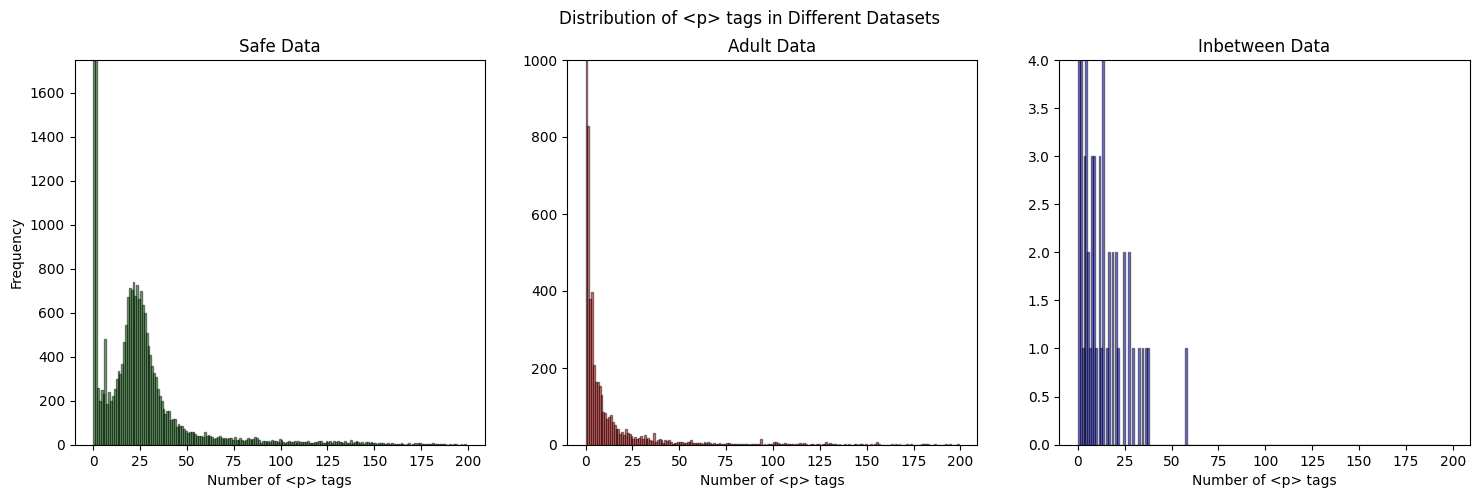

In [20]:
def count_external_links(data):
    return [len(item['main_content']) for item in data]

p_count_safe = count_external_links(safeData)
p_count_adult = count_external_links(adultData)
p_count_inbetween = count_external_links(inBetweenData)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Ensure sharey=False for independent y-limits

axes[0].hist(p_count_safe, bins=range(0, 200), alpha=0.5, color='green', edgecolor='black')
axes[0].set_title('Safe Data')
axes[0].set_xlabel('Number of <p> tags')
axes[0].set_ylabel('Frequency')
axes[0].set_ylim(0, 1750)  # Unique y-limit for the first plot

axes[1].hist(p_count_adult, bins=range(0, 200), alpha=0.5, color='red', edgecolor='black')
axes[1].set_title('Adult Data')
axes[1].set_xlabel('Number of <p> tags')
axes[1].set_ylim(0, 1000)  # Unique y-limit for the second plot

axes[2].hist(p_count_inbetween, bins=range(0, 200), alpha=0.5, color='blue', edgecolor='black')
axes[2].set_title('Inbetween Data')
axes[2].set_xlabel('Number of <p> tags')
axes[2].set_ylim(0, 4)  # Unique y-limit for the third plot

fig.suptitle('Distribution of <p> tags in Different Datasets')
plt.show()

#### Proportion of adult pages with less than n, \<p\> tags

In [24]:
n = 10  # You can change this value to any number you want

def proportion_less_than_k_main_content(data, n):
    count_less_than_k = sum(1 for item in data if len(item['main_content']) < n)
    return count_less_than_k / len(data)

proportion_adult_less_than_k_main_content = proportion_less_than_k_main_content(adultData, n)
print(f"Proportion of adult pages with less than {n} main content items: ", proportion_adult_less_than_k_main_content)

Proportion of adult pages with less than 10 main content items:  0.8129696632340663


### Computing optimal cutoff point for main content
Split miniAdult into 5 sets of 10:

Try values of n (number of main_content)
<ul>
    <li>Test on 10 data-points</li>
    <li>Record time it takes to get all 10 outputs</li>
    <li>Record avg accuracy of all 10 outputs</li>
    <li>Get accuracy/time ratio</li>
</ul>

## Headers \<h1\>, \<h2\>

### Hyperparameter 3: number of H1 / H2 elements
#### Adult have less of both but significantly less H2

In [7]:
def format(output):
    return str(round(output*100,4))
def average_headings(data):
    total_h1 = sum(len(item['headings']['h1']) for item in data)
    total_h2 = sum(len(item['headings']['h2']) for item in data)
    avg_h1 = total_h1 / len(data)
    avg_h2 = total_h2 / len(data)

    return format(avg_h1), format(avg_h2)

avg_h1_safe, avg_h2_safe = average_headings(safeData)
avg_h1_adult, avg_h2_adult = average_headings(adultData)
avg_h1_inbetween, avg_h2_inbetween = average_headings(inBetweenData)

print("Average number of h1 elements for safe data: ", avg_h1_safe, "\nAverage number of h2 elements for safe data: ", avg_h2_safe)
print("Average number of h1 elements for adult data: ", avg_h1_adult, "\nAverage number of h2 elements for adult data: ", avg_h2_adult)
print("Average number of h1 elements for inbetween data: ", avg_h1_inbetween, "\nAverage number of h2 elements for inbetween data: ", avg_h2_inbetween)

Average number of h1 elements for safe data:  90.0895 
Average number of h2 elements for safe data:  297.0958
Average number of h1 elements for adult data:  74.9095 
Average number of h2 elements for adult data:  195.3938
Average number of h1 elements for inbetween data:  85.1852 
Average number of h2 elements for inbetween data:  559.2593


## Links

### Hyperparameter 4: number of internal / external links
#### External seems less useful but clearly higher average internal links for adult pages

In [6]:
def format(output):
    return str(round(output,4))

def average_links(data):
    total_internal = sum(len(item['links']['internal']) for item in data)
    total_external = sum(len(item['links']['external']) for item in data)
    avg_internal = total_internal / len(data)
    avg_external = total_external / len(data)
    return format(avg_internal), format(avg_external)

avg_internal_safe, avg_external_safe = average_links(safeData)
avg_internal_adult, avg_external_adult = average_links(adultData)
avg_internal_inbetween, avg_external_inbetween = average_links(inBetweenData)
avg_internal_total, avg_external_total = average_links(mainData)

print("Average number of internal links for safe data: ", avg_internal_safe, "\nAverage number of external links for safe data: ", avg_external_safe)
print("Average number of internal links for adult data: ", avg_internal_adult, "\nAverage number of external links for adult data: ", avg_external_adult)
print("Average number of internal links for inbetween data: ", avg_internal_inbetween, "\nAverage number of external links for inbetween data: ", avg_external_inbetween)
print("Average number of internal links for all data: ", avg_internal_total, "\nAverage number of external links for all data: ", avg_external_total)


Average number of internal links for safe data:  15.3132 
Average number of external links for safe data:  76.0702
Average number of internal links for adult data:  42.8915 
Average number of external links for adult data:  55.5423
Average number of internal links for inbetween data:  32.0185 
Average number of external links for inbetween data:  39.5741
Average number of internal links for all data:  21.7283 
Average number of external links for all data:  71.2533


### Internal links

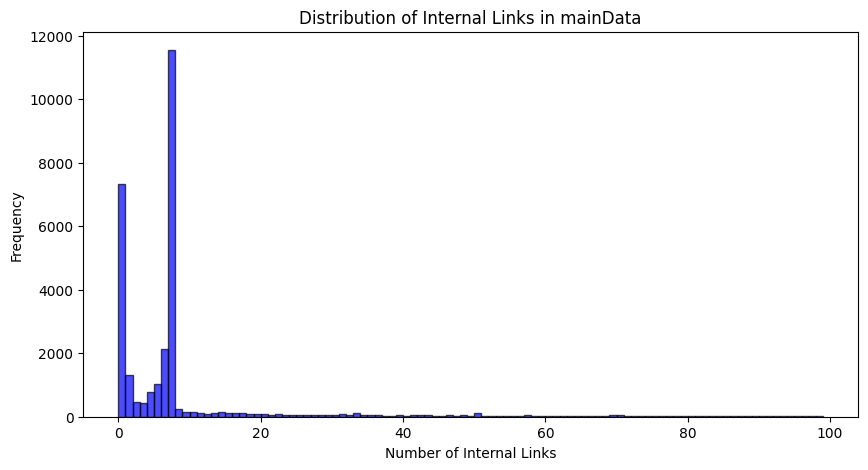

In [9]:
import matplotlib.pyplot as plt

def count_internal_links(data):
    return [len(item['links']['internal']) for item in data]

internal_links_counts = count_internal_links(mainData)

plt.figure(figsize=(10, 5))
plt.hist(internal_links_counts, bins=range(0, 100), alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Number of Internal Links')
plt.ylabel('Frequency')
plt.title('Distribution of Internal Links in mainData')
plt.show()

In [20]:
k = 25  # You can change this value to any number you want

def proportion_less_than_k_links(data, k):
    count_less_than_k = sum(1 for item in data if (len(item['links']['internal']) < k))
    return count_less_than_k / len(data)

proportion_mainData_less_than_k_links = proportion_less_than_k_links(mainData, k)
print(f"Proportion of data points in mainData with less than {k} internal links: ", proportion_mainData_less_than_k_links)


Proportion of data points in mainData with less than 25 internal links:  0.8665936261399155


### External links

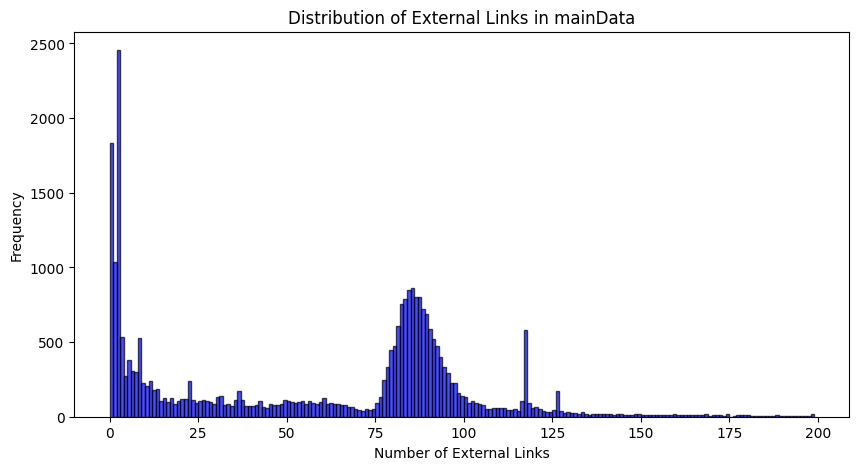

In [11]:
import matplotlib.pyplot as plt

def count_external_links(data):
    return [len(item['links']['external']) for item in data]

external_links_count = count_external_links(mainData)

plt.figure(figsize=(10, 5))
plt.hist(external_links_count, bins=range(0, 200), alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Number of External Links')
plt.ylabel('Frequency')
plt.title('Distribution of External Links in mainData')
plt.show()

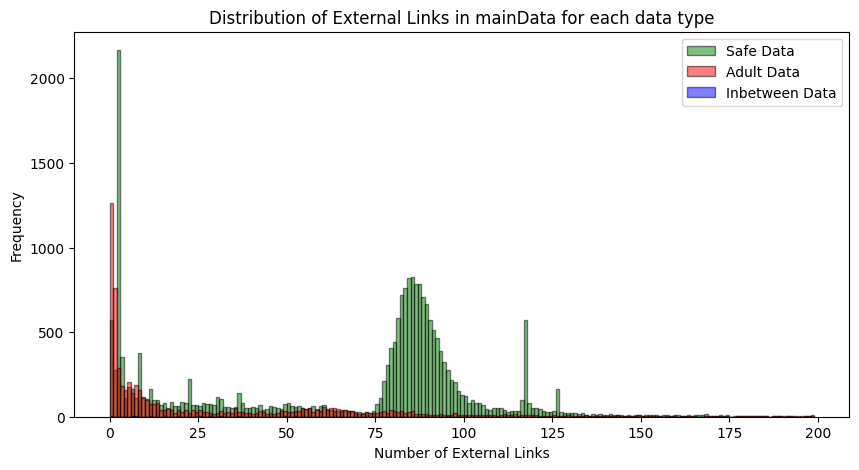

In [12]:
import matplotlib.pyplot as plt

def count_external_links(data):
    return [len(item['links']['external']) for item in data]

external_links_count = count_external_links(mainData)

plt.figure(figsize=(10, 5))
plt.xlabel('Number of External Links')
plt.ylabel('Frequency')
plt.title('Distribution of External Links in mainData for each data type')
plt.hist(count_external_links(safeData), bins=range(0, 200), alpha=0.5, color='green', edgecolor='black', label='Safe Data')
plt.hist(count_external_links(adultData), bins=range(0, 200), alpha=0.5, color='red', edgecolor='black', label='Adult Data')
plt.hist(count_external_links(inBetweenData), bins=range(0, 200), alpha=0.5, color='blue', edgecolor='black', label='Inbetween Data')
plt.legend(loc='upper right')
plt.show()

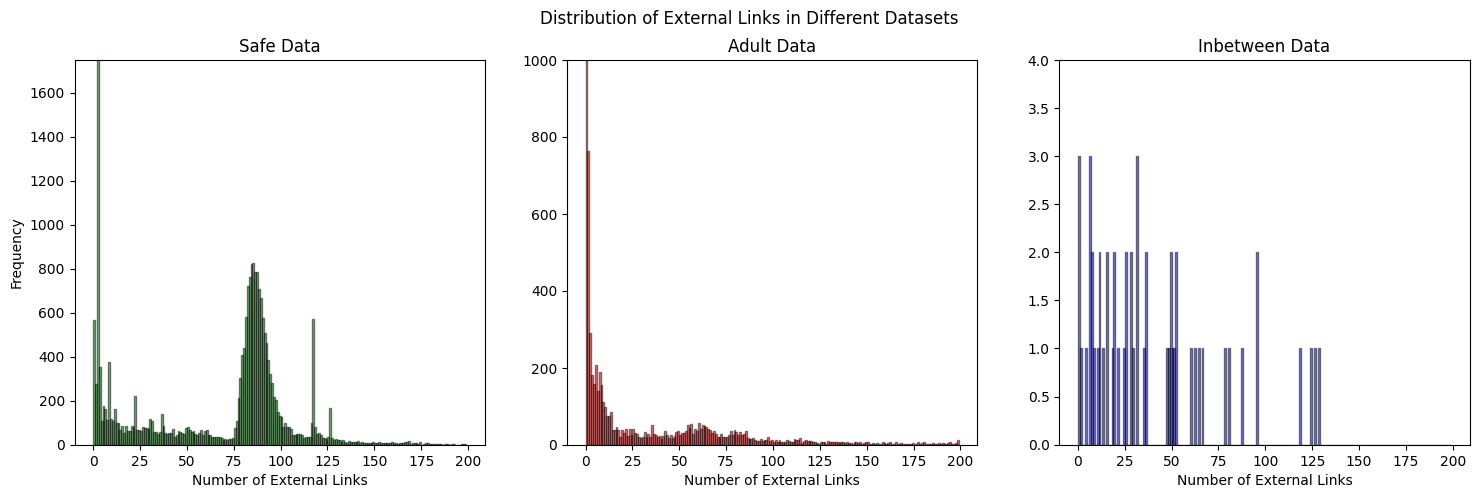

In [13]:
def count_external_links(data):
    return [len(item['links']['external']) for item in data]

external_links_count_safe = count_external_links(safeData)
external_links_count_adult = count_external_links(adultData)
external_links_count_inbetween = count_external_links(inBetweenData)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Ensure sharey=False for independent y-limits

axes[0].hist(external_links_count_safe, bins=range(0, 200), alpha=0.5, color='green', edgecolor='black')
axes[0].set_title('Safe Data')
axes[0].set_xlabel('Number of External Links')
axes[0].set_ylabel('Frequency')
axes[0].set_ylim(0, 1750)  # Unique y-limit for the first plot

axes[1].hist(external_links_count_adult, bins=range(0, 200), alpha=0.5, color='red', edgecolor='black')
axes[1].set_title('Adult Data')
axes[1].set_xlabel('Number of External Links')
axes[1].set_ylim(0, 1000)  # Unique y-limit for the second plot

axes[2].hist(external_links_count_inbetween, bins=range(0, 200), alpha=0.5, color='blue', edgecolor='black')
axes[2].set_title('Inbetween Data')
axes[2].set_xlabel('Number of External Links')
axes[2].set_ylim(0, 4)  # Unique y-limit for the third plot

fig.suptitle('Distribution of External Links in Different Datasets')
plt.show()

In [19]:
k = 1000 # You can change this value to any number you want

def proportion_less_than_k_links(data, k):c
    count_less_than_k = sum(1 for item in data if (len(item['links']['external']) < k))
    return count_less_than_k / len(data)

proportion_mainData_less_than_k_links = proportion_less_than_k_links(mainData, k)
print(f"Proportion of data points in mainData with less than {k} external links: ", proportion_mainData_less_than_k_links)


Proportion of data points in mainData with less than 1000 external links:  0.9991944059549511
